# Decision Trees

In [176]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots

# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# teste

import sklearn
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

In [177]:
data = pd.read_csv('new_marketing_campaign_for_decitrees.csv', sep="\t")

In [178]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [180]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [181]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)
data = data.dropna()

In [182]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [183]:
data["Age"] = 2023 - data["Year_Birth"]
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Marital_Status"]=data["Marital_Status"].replace({"Married":"1", "Together":"1","Absurd":"0", "Widow":"0", "YOLO":"0", "Divorced":"0", "Single":"0", "Alone":"0"})
data["Marital_Status"] = data["Marital_Status"].astype('int64')
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumDealsPurchases": "DealsPurch", "NumWebPurchases": "WebPurch", "NumCatalogPurchases" : "CatalogPurch", "NumStorePurchases": "StorePurch", "NumWebVisitsMonth": "WebVisits"})
to_drop = ["Year_Birth","Z_CostContact", "Z_Revenue", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
data = data.drop(to_drop, axis=1)

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Education       2216 non-null   object        
 2   Marital_Status  2216 non-null   int64         
 3   Income          2216 non-null   float64       
 4   Kidhome         2216 non-null   int64         
 5   Teenhome        2216 non-null   int64         
 6   Dt_Customer     2216 non-null   datetime64[ns]
 7   Recency         2216 non-null   int64         
 8   Wines           2216 non-null   int64         
 9   Fruits          2216 non-null   int64         
 10  Meat            2216 non-null   int64         
 11  Fish            2216 non-null   int64         
 12  Sweets          2216 non-null   int64         
 13  Gold            2216 non-null   int64         
 14  DealsPurch      2216 non-null   int64         
 15  WebPurch 

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Education       2216 non-null   object        
 2   Marital_Status  2216 non-null   int64         
 3   Income          2216 non-null   float64       
 4   Kidhome         2216 non-null   int64         
 5   Teenhome        2216 non-null   int64         
 6   Dt_Customer     2216 non-null   datetime64[ns]
 7   Recency         2216 non-null   int64         
 8   Wines           2216 non-null   int64         
 9   Fruits          2216 non-null   int64         
 10  Meat            2216 non-null   int64         
 11  Fish            2216 non-null   int64         
 12  Sweets          2216 non-null   int64         
 13  Gold            2216 non-null   int64         
 14  DealsPurch      2216 non-null   int64         
 15  WebPurch 

In [186]:
data.describe()

,ID,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Sweets,Gold,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,0.645307,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,54.179603,0.947202,607.075361
min,0.000000,0.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,5.000000
25%,2814.750000,0.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,46.000000,0.000000,69.000000
50%,5458.500000,1.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,53.000000,1.000000,396.500000
75%,8421.750000,1.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,64.000000,1.000000,1048.000000
max,11191.000000,1.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,130.000000,3.000000,2525.000000
std,3249.376275,0.478528,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,0.749062,602.900476


In [187]:
data1 = data.copy()
X = data1.drop(['Marital_Status', 'Education', 'Dt_Customer'], axis=1)
y = data['Marital_Status'].to_frame()

In [188]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Education       2216 non-null   object        
 2   Marital_Status  2216 non-null   int64         
 3   Income          2216 non-null   float64       
 4   Kidhome         2216 non-null   int64         
 5   Teenhome        2216 non-null   int64         
 6   Dt_Customer     2216 non-null   datetime64[ns]
 7   Recency         2216 non-null   int64         
 8   Wines           2216 non-null   int64         
 9   Fruits          2216 non-null   int64         
 10  Meat            2216 non-null   int64         
 11  Fish            2216 non-null   int64         
 12  Sweets          2216 non-null   int64         
 13  Gold            2216 non-null   int64         
 14  DealsPurch      2216 non-null   int64         
 15  WebPurch 

In [189]:
X

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids,Spent
0,5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,66,0,1617
1,2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,69,2,27
2,4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,58,0,776
3,6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,39,1,53
4,5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,42,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,56,1,1341
2236,4001,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,77,3,444
2237,7270,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,42,0,1241
2238,8235,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,67,1,843


In [190]:
y

,Marital_Status
0,0
1,0
2,1
3,1
4,1
...,...
2235,1
2236,1
2237,0
2238,1


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2023)

In [192]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))

The shape of X (2216, 19). X_train has shape (1108, 19) while X_test has shape (1108, 19)


In [193]:
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of y (2216, 1). y_train has shape (1108, 1) while y_test has shape (1108, 1)


In [194]:
clf = DecisionTreeClassifier(random_state=2023)

In [195]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2023)

In [196]:
predictions = clf.predict(X_test)
predictions

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [197]:
confusion_matrix(y_test, predictions)

array([[150, 237],
       [228, 493]], dtype=int64)

In [198]:
accuracy_score(y_test, predictions)

0.5803249097472925

In [199]:
precision_score(y_test, predictions)

0.6753424657534246

In [200]:
recall_score(y_test, predictions)

0.6837725381414702

In [201]:
roc_auc_score(y_test, predictions)

0.5356847186831382

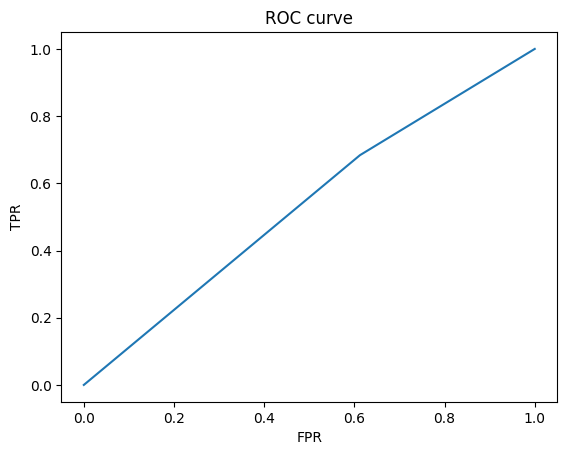

In [202]:
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [203]:
f1_score(y_test, predictions)

0.6795313576843557

In [204]:
fbeta_score(y_test, predictions, beta=0.5)

0.6770118099423236

### ---------------------------------------------------
# Regressão com dinheiro Gasto

In [207]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [208]:
data2 = data.copy()
X = data1.drop(['Marital_Status', 'Education', 'Dt_Customer', 'Spent'], axis=1)
y = data['Spent'].to_frame()

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Education       2216 non-null   object        
 2   Marital_Status  2216 non-null   int64         
 3   Income          2216 non-null   float64       
 4   Kidhome         2216 non-null   int64         
 5   Teenhome        2216 non-null   int64         
 6   Dt_Customer     2216 non-null   datetime64[ns]
 7   Recency         2216 non-null   int64         
 8   Wines           2216 non-null   int64         
 9   Fruits          2216 non-null   int64         
 10  Meat            2216 non-null   int64         
 11  Fish            2216 non-null   int64         
 12  Sweets          2216 non-null   int64         
 13  Gold            2216 non-null   int64         
 14  DealsPurch      2216 non-null   int64         
 15  WebPurch 

In [210]:
X

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids
0,5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,66,0
1,2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,69,2
2,4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,58,0
3,6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,39,1
4,5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,56,1
2236,4001,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,77,3
2237,7270,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,42,0
2238,8235,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,67,1


In [211]:
y

,Spent
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2024)

In [214]:
import time

def analise_model(model, y_train_analise=y_train): 
    start_time = time.time()
    model.fit(X_train, y_train_analise)
    predictions = model.predict(X_test)
    print("time - {}".format(time.time()-start_time))
    predictions  = predictions.reshape(len(predictions),1 )
    # Métricas
    print(model)
    print("Parâmetros:")
    print(model.get_params())
    print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error: ", mean_squared_error(y_test, predictions, squared=True))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    
   # sns.displot(y_test-predictions)
   # plt.show() 
    ax = plt.axes()
    ax.plot([0, 500, 1000, 2000, 2500, 3000], [0, 500, 1000, 2000, 2500, 3000], 'r')
    plt.scatter(y_test,predictions)
    plt.show()
    return predictions

time - 0.031180143356323242
DecisionTreeRegressor(random_state=2024)
Parâmetros:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2024, 'splitter': 'best'}
Mean Absolute Error:  60.81768953068592
Mean Squared Error:  10870.805054151624
RMSE:  104.26315290720699


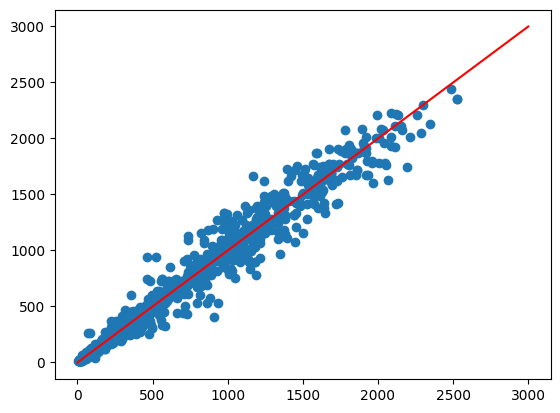

time - 0.31914591789245605
RandomForestRegressor(max_depth=10, n_estimators=20, random_state=2024)
Parâmetros:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 2024, 'verbose': 0, 'warm_start': False}
Mean Absolute Error:  38.05326965673286
Mean Squared Error:  4219.88473834573
RMSE:  64.96063991638113


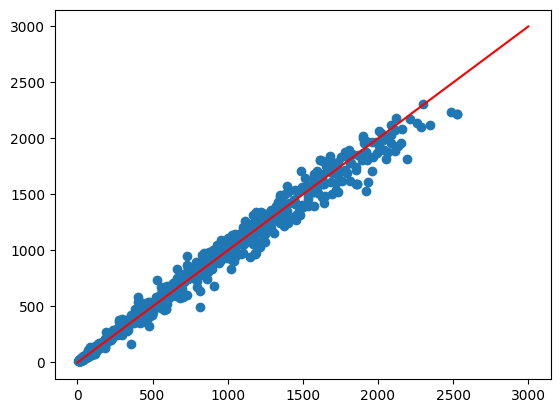

time - 0.5132284164428711
GradientBoostingRegressor(random_state=2024)
Parâmetros:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 2024, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Mean Absolute Error:  29.54153585511958
Mean Squared Error:  2107.2955383069648
RMSE:  45.90528878361364


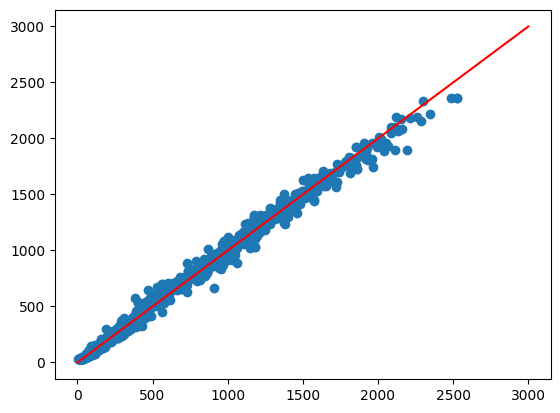

array([[  63.35775418],
       [ 665.95825231],
       [ 837.05756707],
       ...,
       [1649.71340201],
       [1137.65800249],
       [1633.59560183]])

In [215]:
dtr = DecisionTreeRegressor(random_state=2024)
rfr = RandomForestRegressor(n_estimators=20, max_depth=10, criterion='squared_error', random_state=2024)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2024)

analise_model(dtr)
analise_model(rfr, y_train.values.ravel() )
analise_model(gbr)